# Drunkard's Walk (Caminhada do bêbado)

### Modulos

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import random

### Função para gerar Matriz de Transição.

In [6]:
def Gera_MatrizTransicao(direito, dimensao):
    esquerdo = 1 - direito
    MatrizTransicao = np.diag(esquerdo*np.ones(dimensao), k=-1) + np.diag(direito*np.ones(dimensao), k=1) 
    MatrizTransicao[0, :] = 0
    MatrizTransicao[0, 0] = 1
    MatrizTransicao[dimensao, :] = 0
    MatrizTransicao[dimensao, dimensao] = 1
    return MatrizTransicao
X = float(input('Probabilidade de ir para direita: '))
print(f'Probabilidade de ir para esquerda: {1-X:.2f}')
Y = int(input('Posição da casa: '))
bar = int(input('Posição do bar: '))
Matriz_trans = Gera_MatrizTransicao(X,Y)

Probabilidade de ir para direita: 0.50
Probabilidade de ir para esquerda: 0.50
Posição da casa: 7
Posição do bar: 1


### Matriz de Transição

In [7]:
Matriz_trans

array([[1. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ],
       [0.5, 0. , 0.5, 0. , 0. , 0. , 0. , 0. ],
       [0. , 0.5, 0. , 0.5, 0. , 0. , 0. , 0. ],
       [0. , 0. , 0.5, 0. , 0.5, 0. , 0. , 0. ],
       [0. , 0. , 0. , 0.5, 0. , 0.5, 0. , 0. ],
       [0. , 0. , 0. , 0. , 0.5, 0. , 0.5, 0. ],
       [0. , 0. , 0. , 0. , 0. , 0.5, 0. , 0.5],
       [0. , 0. , 0. , 0. , 0. , 0. , 0. , 1. ]])

### Forma Canônica

In [9]:
A = [0, Y]
B = range(1, Y)
P = Gera_MatrizTransicao(X,Y)
Matriz_Identidade = P[np.ix_(A, A)]
Matriz_Absorvente = P[np.ix_(B, A)]
Matriz_Transiente = P[np.ix_(B, B)]
Matriz_nula = np.zeros([len(Matriz_Identidade),len(Matriz_Transiente)])
print("\nMatriz de estado transiente\n")
print(Matriz_Transiente,"\n")
print("\nMatriz Transiente --> Absorvente\n")
print(Matriz_Absorvente,"\n")
print("\nMatriz Nula\n")
print(Matriz_nula)
print("\nMatriz Identidade\n")
print(Matriz_Identidade,"\n")


Matriz de estado transiente

[[0.  0.5 0.  0.  0.  0. ]
 [0.5 0.  0.5 0.  0.  0. ]
 [0.  0.5 0.  0.5 0.  0. ]
 [0.  0.  0.5 0.  0.5 0. ]
 [0.  0.  0.  0.5 0.  0.5]
 [0.  0.  0.  0.  0.5 0. ]] 


Matriz Transiente --> Absorvente

[[0.5 0. ]
 [0.  0. ]
 [0.  0. ]
 [0.  0. ]
 [0.  0. ]
 [0.  0.5]] 


Matriz Nula

[[0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]]

Matriz Identidade

[[1. 0.]
 [0. 1.]] 



### Matriz Fundamental

In [10]:
Matriz_indent_fundamental= (np.eye(len(Matriz_Transiente)))
Subtracao = np.subtract(Matriz_indent_fundamental,Matriz_Transiente)
matriz_fundamental = np.linalg.inv(Subtracao)

print("\nMatriz fundamental\n")
np.set_printoptions(suppress = True, precision=3)
print(matriz_fundamental,"\n")

Vetor_t = matriz_fundamental.sum(axis=1)
matriz_b = np.dot(matriz_fundamental,Matriz_Absorvente)
print("\nVetor t\n")
np.set_printoptions(precision=0)
print(Vetor_t,"\n")
np.set_printoptions(suppress = True, precision=3)
print("\nMatriz B\n")
print(matriz_b,"\n")




Matriz fundamental

[[1.714 1.429 1.143 0.857 0.571 0.286]
 [1.429 2.857 2.286 1.714 1.143 0.571]
 [1.143 2.286 3.429 2.571 1.714 0.857]
 [0.857 1.714 2.571 3.429 2.286 1.143]
 [0.571 1.143 1.714 2.286 2.857 1.429]
 [0.286 0.571 0.857 1.143 1.429 1.714]] 


Vetor t

[ 6. 10. 12. 12. 10.  6.] 


Matriz B

[[0.857 0.143]
 [0.714 0.286]
 [0.571 0.429]
 [0.429 0.571]
 [0.286 0.714]
 [0.143 0.857]] 




### Calculo de Autovalores e Autovetores

In [11]:
np.set_printoptions(suppress= True,precision=3)
autovalor, autovetor = np.linalg.eig(Matriz_trans.T)
print('\nAutovalores\n')
print(autovalor)
print()

print('\nMatriz de autovetores normalizados\n')
print(autovetor)
print()


Autovalores

[ 1.     1.    -0.901 -0.623  0.901  0.623 -0.223  0.223]


Matriz de autovetores normalizados

[[ 1.     0.     0.061 -0.127  0.605  0.437 -0.204 -0.303]
 [ 0.     0.    -0.231  0.411 -0.12  -0.329  0.499  0.471]
 [ 0.     0.     0.416 -0.513 -0.216 -0.41  -0.222  0.21 ]
 [ 0.     0.    -0.519  0.228 -0.269 -0.182 -0.4   -0.378]
 [ 0.     0.     0.519  0.228 -0.269  0.182  0.4   -0.378]
 [ 0.     0.    -0.416 -0.513 -0.216  0.41   0.222  0.21 ]
 [ 0.     0.     0.231  0.411 -0.12   0.329 -0.499  0.471]
 [ 0.     1.    -0.061 -0.127  0.605 -0.437  0.204 -0.303]]



### Decomposição espectral

In [13]:
np.set_printoptions(suppress= True,precision=3)
print('\n(matriz S)\n')
print(autovetor)
print()

print('\nMatriz Diagonal (matriz Λ)\n')
matrizdiagonal = np.diag(autovalor)
print(matrizdiagonal)
print()

print('\nMatriz de autovetores inversa (Matriz S-¹)\n')
matrizAutovetoresInversa = np.linalg.inv(autovetor)
print(matrizAutovetoresInversa)
print()

print('\nDecomposição Espectral (SΛS-¹)\n')
decomposição_sas = np.matmul(np.matmul(autovetor,matrizdiagonal),np.linalg.inv(autovetor))
print(decomposição_sas)
print()


(matriz S)

[[ 1.     0.     0.061 -0.127  0.605  0.437 -0.204 -0.303]
 [ 0.     0.    -0.231  0.411 -0.12  -0.329  0.499  0.471]
 [ 0.     0.     0.416 -0.513 -0.216 -0.41  -0.222  0.21 ]
 [ 0.     0.    -0.519  0.228 -0.269 -0.182 -0.4   -0.378]
 [ 0.     0.     0.519  0.228 -0.269  0.182  0.4   -0.378]
 [ 0.     0.    -0.416 -0.513 -0.216  0.41   0.222  0.21 ]
 [ 0.     0.     0.231  0.411 -0.12   0.329 -0.499  0.471]
 [ 0.     1.    -0.061 -0.127  0.605 -0.437  0.204 -0.303]]


Matriz Diagonal (matriz Λ)

[[ 1.     0.     0.     0.     0.     0.     0.     0.   ]
 [ 0.     1.     0.     0.     0.     0.     0.     0.   ]
 [ 0.     0.    -0.901  0.     0.     0.     0.     0.   ]
 [ 0.     0.     0.    -0.623  0.     0.     0.     0.   ]
 [ 0.     0.     0.     0.     0.901  0.     0.     0.   ]
 [ 0.     0.     0.     0.     0.     0.623  0.     0.   ]
 [ 0.     0.     0.     0.     0.     0.    -0.223  0.   ]
 [ 0.     0.     0.     0.     0.     0.     0.     0.223]]


Matriz de

# Simulação Drunkard's Walk


posição inicial do bebado: 4



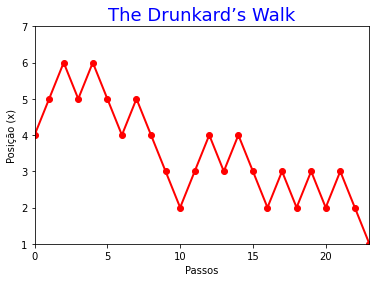


Ele chegou no bar após 23 passos.


In [19]:
tabela=[]
while True:
    pos_beb = int(input('posição inicial do bebado: '))
    print()
    if (pos_beb>=Y or pos_beb<=0):
        print('Valor Inválido')
    else:
        valor_atual=pos_beb
        tabela.append(valor_atual)
        break
fim = 0
while True:
    fim +=1
    aleatorio = random.random()
    if (aleatorio > X):
        valor_atual-=1
        tabela.append(valor_atual)
    else:
        valor_atual+=1
        tabela.append(valor_atual)

    if (valor_atual == Y or valor_atual == bar):
        break

#fig = plt.figure(figsize=(6,3),dpi=200)

plt.title('The Drunkard’s Walk',fontsize = 18, c='b')
plt.plot(tabela,c='r', lw=2, ls='-',marker='o')
plt.axis([0,fim,bar,Y])
plt.xlabel("Passos",fontsize = 10)
plt.ylabel("Posição (x)",fontsize = 10)
plt.show()
print()
passos = 0
for i in tabela:
  passos += 1
if tabela[-1] == bar:
  print(f'Ele chegou no bar após {passos-1} passos.') 
else:
  print(f'Ele chegou em casa após {passos-1} passos.') 